# U - Net
## Problem: 

Seismic data is collected using reflection seismology, or seismic reflection. The method requires a controlled seismic source of energy, such as compressed air or a seismic vibrator, and sensors record the reflection from rock interfaces within the subsurface. The recorded data is then processed to create a 3D view of earth’s interior. Reflection seismology is similar to X-ray, sonar and echolocation.

A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. In theory, the strength of reflection is directly proportional to the difference in the physical properties on either sides of the interface. While seismic images show rock boundaries, they don't say much about the rock themselves; some rocks are easy to identify while some are difficult.

There are several areas of the world where there are vast quantities of salt in the subsurface. One of the challenges of seismic imaging is to identify the part of subsurface which is salt. Salt has characteristics that makes it both simple and hard to identify. Salt density is usually 2.14 g/cc which is lower than most surrounding rocks. The seismic velocity of salt is 4.5 km/sec, which is usually faster than its surrounding rocks. This difference creates a sharp reflection at the salt-sediment interface. Usually salt is an amorphous rock without much internal structure. This means that there is typically not much reflectivity inside the salt, unless there are sediments trapped inside it. The unusually high seismic velocity of salt can create problems with seismic imaging.

### Data
The data is a set of images chosen at various locations chosen at random in the subsurface. The images are 101 x 101 pixels and each pixel is classified as either salt or sediment. In addition to the seismic images, the depth of the imaged location is provided for each image. The goal of the competition is to segment regions that contain salt.

#### Source: 
https://www.kaggle.com/c/tgs-salt-identification-challenge


### Note: 
Accept the terms and download data from the above link

### Aim: 

Implement U-Net neural model architecture in keras to solve this problem.


In this, you are asked to segment salt deposits beneath the Earth’s surface. Given a set of seismic images that are 101 x 101 pixels each and each pixel we need to classify as either salt or sediment. Our goal is to segment regions that contain salt. A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. 

### Broad Steps:

1. Download the dataset
2. Upload to Drive
3. Import from drive to colab
4. Load the images and create training data.
5. Build U-net Model
6. Train your model.
7. Check the validation accuracy and plot sample.

In [2]:
#Importing necessary libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [3]:

#Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### 1.Set your project path where you have your data and related files for this lab.

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/R9_External')

In [0]:
project_path='/content/drive/My Drive/Colab Notebooks/R9_External/'

### 2. Set the necessary parameters

## Setup

In [0]:
im_width = 128      #width of your train image
im_height = 128     #hight of your train image
#border =        
path_train = project_path + 'train/'   #Path for your train data

In [28]:
print(path_train)

/content/drive/My Drive/Colab Notebooks/R9_External/train/


# 3. Make directory for train data at in your project/lab folder.

Hint - use !mkdir function.

In [0]:
!mkdir train

# 4. Extract your train images to the train directory you have just created above. 
train.zip and test.zip files available at your google drive/local system.

As a good practice - Upload or copy the data at your project path folder.

Make sure you are providing the right project_path.

In [0]:
#For simplicity we have added the required code here.
from zipfile import ZipFile

with ZipFile(project_path + 'train.zip', 'r') as zf:
  zf.extractall('train/')


In [0]:
#The train file have both images and masks with the same names_ids.

In [31]:
!ls -l train

total 8
drwx------ 2 root root 4096 Aug 16 16:52 images
drwx------ 2 root root 4096 Aug 16 16:53 masks


### 5. Get the list of names of images and masks and name the list imagelist and masklist.

Hint - Use os.listdir() funtions.

In [0]:
imagelist=os.listdir('train/images')
masklist=os.listdir('train/masks')

In [33]:
#Test your list names by printing some of the names as given below.
print(imagelist[-1])
print(masklist[-1])
print(imagelist[10])
print(masklist[10])

7cc53fe88b.png
7cc53fe88b.png
de08c5a3b7.png
de08c5a3b7.png


In [34]:
!ls -l

total 39459
-rw------- 1 root root   580602 Aug  7 12:50 data-20190421T070619Z-001.zip
-rw------- 1 root root    63120 Aug 16 16:48 R9_External_Lab_Questions-1.ipynb
drwx------ 4 root root     4096 Aug 16 16:52 train
-rw------- 1 root root 39757560 Aug  7 12:50 train.zip


# 6. Read and test your images and respective masks.

Hint -

import  matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread('path of image'))

plt.imshow(cv2.imread('path of mask'))


In [0]:
import cv2

In [0]:
import matplotlib.pyplot as plt2

In [0]:
img=imread('train/images/' + imagelist[10])

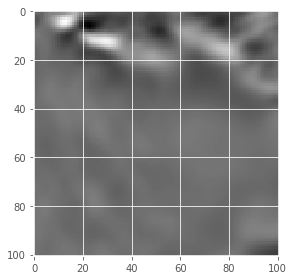

In [38]:
imshow(img)

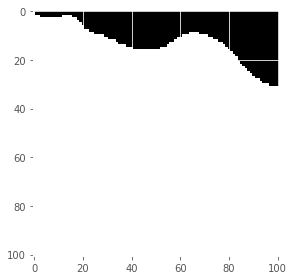

In [39]:
imshow(imread('train/masks/'+masklist[10]))

# 7. Create your training data.

Hints - 

image_path = os.path.join(project_path +'path of your image directory' +n )

mask_path = os.path.join(project_path +'path of your mask directory'+n )

In [40]:
# Get and resize train images and masks
def get_data():
    X = np.zeros(((len(imagelist), im_height, im_width, 1)), dtype=np.float32) # Create an array for image
    y = np.zeros(((len(masklist), im_height, im_width, 1)), dtype=np.float32) #Create an array for mask
    
    for n in imagelist: 
        k = imagelist.index(n)
        ##Add image_path
        image_path =os.path.join(path_train +'images/' +n )
        ##Add mask_path
        mask_path =os.path.join(path_train +'masks/' +n )                                                            
        
        # Load images and resize to (128,128,1)
        
        x_img = img_to_array(load_img(image_path, grayscale=True))
        resized_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
        
        # Load masks and resize to (128,128,1)
        
        mask = img_to_array(load_img(mask_path, grayscale=True))
        resized_mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
        
        # Save images
        X[k, ..., 0] = resized_img.squeeze() / 255
        y[k] = resized_mask/255
    print('Done!')
    if imagelist:
        return X, y
    else:
        return X
    
X, y = get_data()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Done!


In [0]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

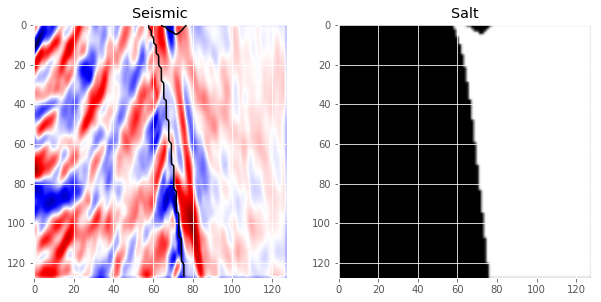

In [42]:
## Test your data whether it looks fine - Random check
import random 
# Check if training data looks all right
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Seismic')

ax[1].imshow(y_train[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('Salt');




In [0]:
from keras import backend as K

### 8. Define loss and dice_coeff function.

In [0]:
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)



In [0]:
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

### 9. Build and compile UNet Model for your data.

Hint - 
You can install and use segmentation models from this github repository.

#Install segmentation models

!pip install git+https://github.com/qubvel/segmentation_models

In [46]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-zy4b77pw
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-zy4b77pw
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0b1-cp36-none-any.whl size=33615 sha256=64d37c8158ab5f6420cbbbb8d613c2235c2c543a5a44e850a186bbddf443f3c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c8g95hl/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0b1-cp36-none-any.whl size=19956 sha256=2d934494de4089d4d553e38c6e96ca061b5f5a0725418a21f851a6f3c033ff5c
  Stored in directory: /root/.cache/pip/wheels/a4/22/b6/715c09496e4a64024b00a695e07a2b5804286f4840852fbcd3
  Created wheel for efficientnet: filename=efficientnet-1.0.0b3-cp36-none-any.whl size=13401 sha256=13992de67965d8bf1ed2940f5d6e83f6251e0b02bce7f29483d5203251ea

In [47]:
!pip install segmentation_models

In [0]:
import segmentation_models as sm


# define model
model = sm.Unet(backbone_name='resnet34', encoder_weights=None, input_shape=(None, None, 1))
model.compile('Adam',loss=dice_coef_loss,metrics=[dice_coef])

In [0]:
#Get the summary of your model


In [49]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, None, None, 1 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 1 3           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_205 (ZeroPadding (None, None, None, 1 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 3136        zero_padding2d_205[0][0]         
__________________________________________________________________________________________________
bn0 (Batch

### 10. Fit your model using model.fit function.
Hint - As it might take long time to run. Run it for only 1 or 2 epochs.

In [50]:
model.fit(X_train, y_train, batch_size=32, epochs=2,
                    validation_data=(X_valid, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/2
3400/3400 [==============================] - 44s 13ms/step - loss: 0.3991 - dice_coef: 0.6009 - val_loss: 0.3950 - val_dice_coef: 0.6050
Epoch 2/2
3400/3400 [==============================] - 20s 6ms/step - loss: 0.2894 - dice_coef: 0.7106 - val_loss: 0.3015 - val_dice_coef: 0.6985


### 11.Predict on val set using model.predict funtion and store in preds_val variable.



In [51]:
preds_val = model.predict(X_valid, verbose=1)

600/600 [==============================] - 3s 5ms/step


In [0]:
#Get the threshold predictions to look at refined results.
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [0]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=10):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

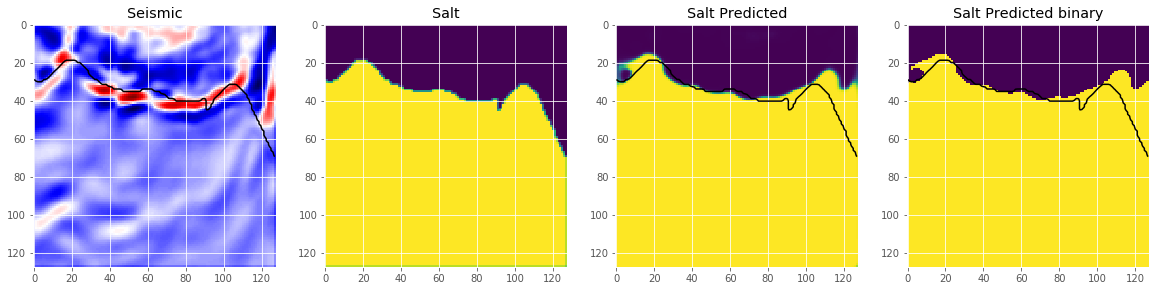

In [61]:
# Check if valid data looks all right
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=15)

If you are getting good results- Congratulations.
If you are not, try to explore what might be the reason.

# Text generation using a RNN

Given a sequence of words from this data, train a model to predict the next word in the sequence. Longer sequences of text can be generated by calling the model repeatedly.

**Mount your Google Drive**

In [0]:
#Already Set

In [0]:
from zipfile import ZipFile

with ZipFile(project_path + 'data-20190421T070619Z-001.zip', 'r') as zf:
  zf.extractall()

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/R9_External/data/data')

### Import Keras and other libraries

In [0]:
#importing libraries

import glob
from sklearn.utils import shuffle
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,Dropout,Embedding,Masking,Bidirectional,RNN,SimpleRNN
from keras.optimizers import Adam
from keras import backend

## Download data
Reference: Data is collected from http://www.gutenberg.org

For the lab purpose, you can load the dataset provided by Great Learning

### Load the Oscar Wilde dataset

Store all the ".txt" file names in a list

In [0]:
gutenberg=glob.glob("*.txt")

### Read the data

Read contents of every file from the list and append the text in a new list

In [0]:
codetext= []
bookranges= []
for gutenfile in gutenberg:
    gutentext=open(gutenfile,"r")
    start=len(codetext)
    codetext.append(gutentext.read())
    end=len(codetext)
    bookranges.append({"start":start,"end":end,"name": gutenfile.rsplit("/",1)[-1]})
    gutentext.close()

In [28]:
bookranges

[{'end': 1, 'name': 'The Soul of Man.txt', 'start': 0},
 {'end': 2, 'name': 'Shorter Prose Pieces.txt', 'start': 1},
 {'end': 3, 'name': 'The Happy Prince and other tales.txt', 'start': 2},
 {'end': 4, 'name': 'The Ballad of Reading Gaol.txt', 'start': 3},
 {'end': 5, 'name': 'The Importance of Being Earnest.txt', 'start': 4},
 {'end': 6, 'name': 'The Canterville Ghost.txt', 'start': 5},
 {'end': 7,
  'name': 'Selected prose of oscar wilde with a Preface by Robert Ross.txt',
  'start': 6},
 {'end': 8, 'name': 'Vera or, The Nihilists.txt', 'start': 7},
 {'end': 9, 'name': 'The Duchess of Padua.txt', 'start': 8},
 {'end': 10, 'name': 'The Picture of Dorian Gray.txt', 'start': 9}]

## Process the text
Initialize and fit the tokenizer

In [0]:
tokenizer=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(codetext)

### Vectorize the text

Before training, we need to map strings to a numerical representation. Create two lookup tables: one mapping words to numbers, and another for numbers to words.

In [0]:
word_idx=tokenizer.word_index
idx_word=tokenizer.index_word

Get the word count for every word and also get the total number of words.

In [0]:
word_count=tokenizer.word_counts
num_words=len(word_idx)+1

Convert text to sequence of numbers

In [0]:
sequences=tokenizer.texts_to_sequences(codetext)

### Generate Features and Labels

In [0]:
features = []
labels = []

training_length=50
#Iterate through the sequences of tokens
for seq in sequences:
  #for creating multiple traing examples from each sequence
  for i in range(training_length,training_length+300):
    #extract the features and label
    extract=seq[i - training_length :i-training_length + 20]
    #set the features and label
    features.append(extract[:-1])
    labels.append(extract[:-1])

### The prediction task

Given a word, or a sequence of words, what is the most probable next word? This is the task we're training the model to perform. The input to the model will be a sequence of words, and we train the model to predict the output—the following word at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the words computed until this moment, what is the next word?

### Generate training and testing data

In [0]:
from sklearn.utils import shuffle

features,labels =shuffle(features,labels,random_state=1)

#Decide number of samples for training
train_end=int(0.7*len(labels))
train_features=np.array(features[:train_end])
valid_features=np.array(features[train_end:])

train_labels=labels[:train_end]
valid_labels=labels[train_end:]

#convert to arrays
X_train,X_valid=np.array(train_features),np.array(valid_features)

#using int 8 for memory savings
y_train=np.zeros((len(train_labels),num_words),dtype=np.int8)
y_valid=np.zeros((len(valid_labels),num_words),dtype=np.int8)

#one hot encoding labels
for example_index,word_index in enumerate(train_labels):
  y_train[example_index,word_index]=1
  
for example_index,word_index in enumerate(valid_labels):
  y_valid[example_index,word_index]=1

This is just to check the features and labels

In [46]:
for i,sequence in enumerate(X_train[:2]):
  text=[]
  for idx in sequence:
    text.append(idx_word[idx])
    
  print('Features: '+''.join(text)+'\n')
  print('Label:'+ idx_word[np.argmax(y_train[i])]+'\n')

Features: ccx074pglaforgsecondproofbypaulredmondpicturebookcoverpicturethehappyprincethehappyprinceand

Label:the

Features: itsheadwasbaldandburnishedhemetwithaseverefallaheavyjugofwaterfellright

Label:of



## Build The Model

Use `keras.Sequential` to define the model. For this simple example three layers are used to define our model:

* `keras.layers.Embedding`: The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
* `keras.layers.LSTM`: A type of RNN with size `units=rnn_units` (You can also use a GRU layer here.)
* `keras.layers.Dense`: The output layer, with `num_words` outputs.

In [51]:
#Building model
model=Sequential()
model.add(Embedding(input_dim=len(word_idx)+ 1,output_dim=100,weights=None,trainable=True))
#Recurrent Layer
model.add(SimpleRNN(1024, return_sequences=False,dropout=0.1,recurrent_dropout=0.1))
#Dropout for regularization
model.add(Dropout(0.5))
#Output Layer
model.add(Dense(num_words,activation='softmax'))
#compiling Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         1478800   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 1024)              1152000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 14788)             15157700  
Total params: 17,788,500
Trainable params: 17,788,500
Non-trainable params: 0
_________________________________________________________________


For each word the model looks up the embedding, runs the LSTM one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-liklihood of the next word.

## Train the model

In [52]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 118.3861 - acc: 0.4276
Epoch 2/10
2100/2100 [==============================] - 2s 847us/step - loss: 108.6869 - acc: 0.5052
Epoch 3/10
2100/2100 [==============================] - 2s 834us/step - loss: 108.4002 - acc: 0.4867
Epoch 4/10
2100/2100 [==============================] - 2s 840us/step - loss: 108.3422 - acc: 0.5300
Epoch 5/10
2100/2100 [==============================] - 2s 845us/step - loss: 108.2659 - acc: 0.5448
Epoch 6/10
2100/2100 [==============================] - 2s 839us/step - loss: 108.2887 - acc: 0.5662
Epoch 7/10
2100/2100 [==============================] - 2s 837us/step - loss: 108.2473 - acc: 0.5481
Epoch 8/10
2100/2100 [==============================] - 2s 833us/step - loss: 108.4731 - acc: 0.5810
Epoch 9/10
2100/2100 [==============================] - 2s 837us/step - loss: 108.3623 - acc: 0.5833
Epoch 10/10
2100/2100 [==============================] - 2s 842us/step - loss: 108.5814 - acc

### Save Model

In [0]:
# save the model to file
model.save('model_100epochs.h5')

## If you have already trained the model and saved it, you can load a pretrained model

In [0]:
# load the model
model = load_model('model_100epochs.h5')

### Note: After loading the model run  model.fit()  to continue training form there, if required.

In [56]:
model.fit(X_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
2100/2100 [==============================] - 3s 1ms/step - loss: 109.0369 - acc: 0.6133
Epoch 2/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.0104 - acc: 0.5371
Epoch 3/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.0876 - acc: 0.6162
Epoch 4/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.2870 - acc: 0.5614
Epoch 5/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.1274 - acc: 0.5886
Epoch 6/100
2100/2100 [==============================] - 2s 1ms/step - loss: 108.8492 - acc: 0.5490
Epoch 7/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.2158 - acc: 0.5886
Epoch 8/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.2334 - acc: 0.5919
Epoch 9/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.0147 - acc: 0.5671
Epoch 10/100
2100/2100 [==============================] - 2s 1ms/step - loss: 109.3204 - acc: 0.5410

## Evaluation

In [57]:
print(model.evaluate(X_train, y_train, batch_size = 20))
print('\nModel Performance: Log Loss and Accuracy on validation data')
print(model.evaluate(X_valid, y_valid, batch_size = 20))

2100/2100 [==============================] - 2s 830us/step
[87.42681986490885, 0.44666666984558107]

Model Performance: Log Loss and Accuracy on validation data
900/900 [==============================] - 1s 638us/step
[90.51066114637587, 0.4655555569463306]


In [0]:
se=list(sequences)

In [61]:
se

[]

## Generate text

In [65]:
seed_length=50
new_words=50
diversity=1
n_gen=1

import random

# Choose a random sequence
seq = random.choice(sequences)

# print seq

# Choose a random starting point
seed_idx = random.randint(0, len(seq) - seed_length - 10)
# Ending index for seed
end_idx = seed_idx + seed_length

gen_list = []

for n in range(n_gen):
    # Extract the seed sequence
    seed = seq[seed_idx:end_idx]
    original_sequence = [idx_word[i] for i in seed]
    generated = seed[:] + ['#']

    # Find the actual entire sequence
    actual = generated[:] + seq[end_idx:end_idx + new_words]
        
    # Keep adding new words
    for i in range(new_words):

        # Make a prediction from the seed
        preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(np.float64)

        # Diversify
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)

        # Softmax
        preds = exp_preds / sum(exp_preds)

        # Choose the next word
        probas = np.random.multinomial(1, preds, 1)[0]

        next_idx = np.argmax(probas)

        # New seed adds on old word
        #             seed = seed[1:] + [next_idx]
        seed += [next_idx]
        generated.append(next_idx)
    # Showing generated and actual abstract
    n = []

    for i in generated:
        n.append(idx_word.get(i, '< --- >'))

    gen_list.append(n)

a = []

for i in actual:
    a.append(idx_word.get(i, '< --- >'))

a = a[seed_length:]

gen_list = [gen[seed_length:seed_length + len(a)] for gen in gen_list]

print('Original Sequence: \n'+' '.join(original_sequence))
print("\n")
# print(gen_list)
print('Generated Sequence: \n'+' '.join(gen_list[0][1:]))
# print(a)

Original Sequence: 
for a whole week as a guest or anything else you have got to leave by the four five train algernon i certainly won't leave you so long as you are in mourning it would be most unfriendly if i were in mourning you would stay with me i suppose


Generated Sequence: 
somerville publican boards advance luce a brightest punished noting whole corrected things couchent imitating quaint photographs and went olive elle herbert's midnight a they unalterable independent bankrupt puts his time pace seedling academicians ' salome newman caesar hung darken been milk snowy scorching divine blushed rejected fall carlos hinder immured


## Time Series Analysis using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temperature values to "Temperature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temperature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

### Import required libraries

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

#### Mount google drive

In [0]:
#Already mounted

### Load the  data file

In [67]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/daily-minimum-temperatures-in-me.csv',index_col='Date')
print(df.head())

            Temperature
Date                   
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8


### Plot the data

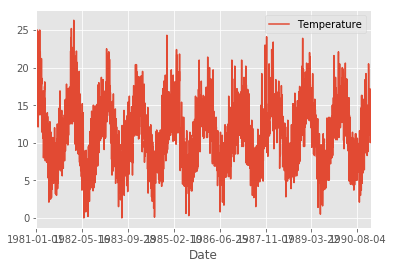

In [68]:
df.plot()

### Check for null values and treat them

In [69]:
df.isnull().sum()

Temperature    0
dtype: int64

#### Drop null values (if any)

In [0]:
#There are no null Values

### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb763979b38>]],
      dtype=object)

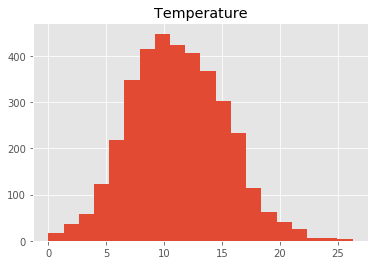

In [70]:
df.hist(bins=20)

### Check the maximum and minimum values

In [71]:
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

### Check the maximum and minimum values of scaled data

In [73]:

print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


### Split data into Training and Testing set 
<u>Note</u> The train and test data has to be sequential. Keep the first 70% of data in training and the bottom 30% in test data 

In [74]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temperature at a particular time t to the temperature at time t+n, where n is any number you define.

For example: to map temperatures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Use function to get training and test set

In [76]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
0
X 0 to 1
[0.78707224]
Y 1
0.6806083650190113
1
X 1 to 2
[0.68060837]
Y 2
0.714828897338403
2
X 2 to 3
[0.7148289]
Y 3
0.5551330798479087
3
X 3 to 4
[0.55513308]
Y 4
0.6007604562737643
4
X 4 to 5
[0.60076046]
Y 5
0.6007604562737643
5
X 5 to 6
[0.60076046]
Y 6
0.6007604562737643
6
X 6 to 7
[0.60076046]
Y 7
0.6615969581749048
7
X 7 to 8
[0.66159696]
Y 8
0.8288973384030418
8
X 8 to 9
[0.82889734]
Y 9
0.7604562737642585
9
X 9 to 10
[0.76045627]
Y 10
0.6159695817490494
10
X 10 to 11
[0.61596958]
Y 11
0.5057034220532319
11
X 11 to 12
[0.50570342]
Y 12
0.6349809885931559
12
X 12 to 13
[0.63498099]
Y 13
0.8174904942965779
13
X 13 to 14
[0.81749049]
Y 14
0.9505703422053232
14
X 14 to 15
[0.95057034]
Y 15
0.7870722433460076
15
X 15 to 16
[0.78707224]
Y 16
0.7832699619771863
16
X 16 to 17
[0.78326996]
Y 17
0.9429657794676806
17
X 17 to 18
[0.94296578]
Y 18
0.6730038022813688
18
X 18 to 19
[0.6730038]
Y 19
0.5893536121673003
19
X 19 to 20
[0.58935361]
Y 20
0.6920152091254752
20
X 20 to 21


### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Define sequntial model, add LSTM layer and compile the model

In [0]:
batch_size = 1 

model = Sequential()

model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Train the model for 100 epochs with batch size = 1

In [79]:
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 16s - loss: 0.0440
Epoch 2/100
 - 15s - loss: 0.0184
Epoch 3/100
 - 15s - loss: 0.0151
Epoch 4/100
 - 15s - loss: 0.0131
Epoch 5/100
 - 15s - loss: 0.0116
Epoch 6/100
 - 14s - loss: 0.0110
Epoch 7/100
 - 14s - loss: 0.0105
Epoch 8/100
 - 15s - loss: 0.0105
Epoch 9/100
 - 14s - loss: 0.0104
Epoch 10/100
 - 15s - loss: 0.0104
Epoch 11/100
 - 15s - loss: 0.0103
Epoch 12/100
 - 15s - loss: 0.0104
Epoch 13/100
 - 14s - loss: 0.0103
Epoch 14/100
 - 14s - loss: 0.0102
Epoch 15/100
 - 14s - loss: 0.0103
Epoch 16/100
 - 14s - loss: 0.0102
Epoch 17/100
 - 14s - loss: 0.0103
Epoch 18/100
 - 14s - loss: 0.0103
Epoch 19/100
 - 14s - loss: 0.0102
Epoch 20/100
 - 15s - loss: 0.0102
Epoch 21/100
 - 14s - loss: 0.0102
Epoch 22/100
 - 14s - loss: 0.0102
Epoch 23/100
 - 14s - loss: 0.0102
Epoch 24/100
 - 14s - loss: 0.0103
Epoch 25/100
 - 14s - loss: 0.0102
Epoch 26/100
 - 14s - loss: 0.0103
Epoch 27/100
 - 15s - loss: 0.0103
Epoch 28/100
 - 14s - loss: 0.0101
Epoch 29/100
 - 14s - loss: 0

### Make Predictions and Evaluate your model

In [80]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.72 RMSE
Test Score: 2.53 RMSE
